## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%config InlineBackend.figure_format = 'svg'
pd.set_option('display.max_columns', 30)

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [10]:
df = pd.read_csv('HistoricalQuotes.csv')
df['Date'] = pd.to_datetime(df['Date'])
start_date = '2017-01-01'
end_date = '2018-12-31'

start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Фильтрация DataFrame по интервалу дат
df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
df_filtered_sorted = df_filtered.sort_values(by='Date')
print(df_filtered_sorted[['Date', ' Close/Last']])

          Date  Close/Last
793 2017-01-03     $116.15
792 2017-01-04     $116.02
791 2017-01-05     $116.61
790 2017-01-06     $117.91
789 2017-01-09     $118.99
..         ...         ...
296 2018-12-24     $146.83
295 2018-12-26     $157.17
294 2018-12-27     $156.15
293 2018-12-28     $156.23
292 2018-12-31     $157.74

[502 rows x 2 columns]


In [8]:
df_filtered_sorted

,Date,Close/Last,Volume,Open,High,Low
793,2017-01-03,$116.15,28769220,$115.8,$116.33,$114.76
792,2017-01-04,$116.02,21081620,$115.85,$116.51,$115.75
791,2017-01-05,$116.61,22115100,$115.92,$116.8642,$115.81
790,2017-01-06,$117.91,31714820,$116.78,$118.16,$116.47
789,2017-01-09,$118.99,33420290,$117.95,$119.43,$117.94
...,...,...,...,...,...,...
296,2018-12-24,$146.83,37169230,$148.15,$151.55,$146.59
295,2018-12-26,$157.17,58133850,$148.3,$157.23,$146.72
294,2018-12-27,$156.15,51608850,$155.84,$156.77,$150.07
293,2018-12-28,$156.23,41740600,$157.5,$158.52,$154.55


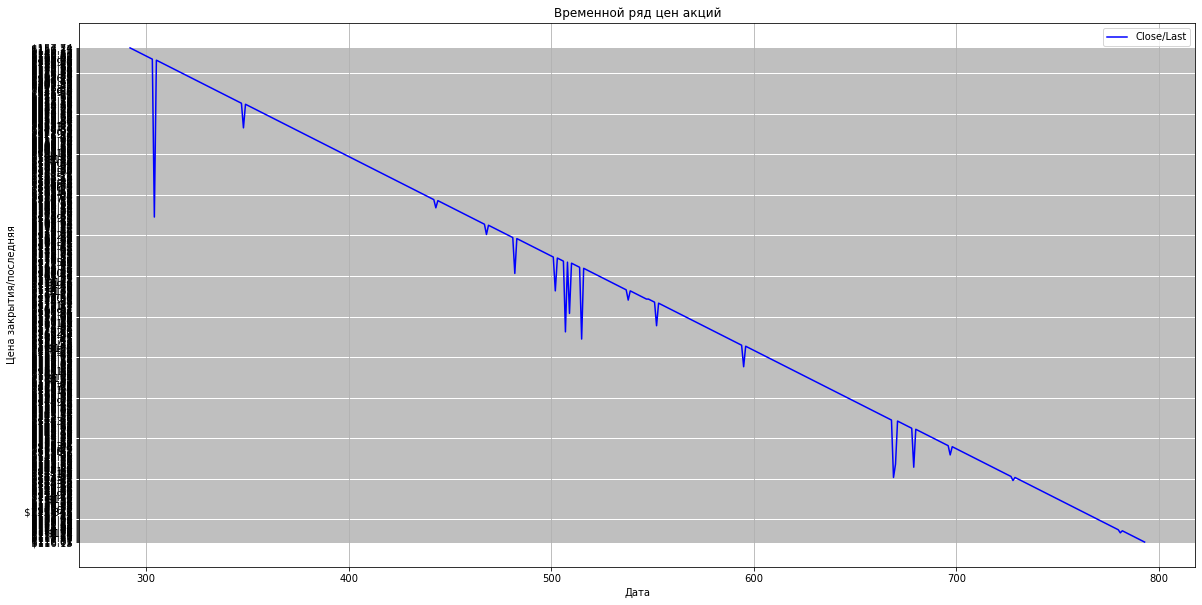

In [9]:
# Визуализация временного ряда
plt.figure(figsize=(20, 10))
plt.plot(df_filtered_sorted.index.values, df_filtered_sorted[' Close/Last'].values, label='Close/Last', color='blue')
plt.title('Временной ряд цен акций')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия/последняя')
plt.legend()
plt.grid(True)
plt.show()

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('HistoricalQuotes.csv')

# Преобразование столбца Date в тип datetime
df['Date'] = pd.to_datetime(df['Date'])

# Задание интервала дат
start_date = '2017-01-01'
end_date = '2018-12-31'

start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Фильтрация DataFrame по интервалу дат
df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
df_filtered_sorted = df_filtered.sort_values(by='Date')

# Преобразование столбца ' Close/Last' в числовой формат
df_filtered_sorted[' Close/Last'] = df_filtered_sorted[' Close/Last'].str.replace('$', '').astype(float)

# Визуализация временного ряда
plt.figure(figsize=(12, 6))
plt.plot(df_filtered_sorted['Date'], df_filtered_sorted[' Close/Last'], label=' Close/Last')
plt.xlabel('Date')
plt.ylabel('Close/Last Price')
plt.title('Time Series of Close/Last Prices')
plt.legend()
plt.show()

# Построение boxplot для выявления выбросов
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filtered_sorted['Close/Last'])
plt.xlabel('Close/Last Price')
plt.title('Boxplot of Close/Last Prices')
plt.show()

# Использование метода IQR для выявления выбросов
Q1 = df_filtered_sorted[' Close/Last'].quantile(0.25)
Q3 = df_filtered_sorted[' Close/Last'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_filtered_sorted[(df_filtered_sorted[' Close/Last'] < lower_bound) | (df_filtered_sorted[' Close/Last'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")
print(outliers)

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

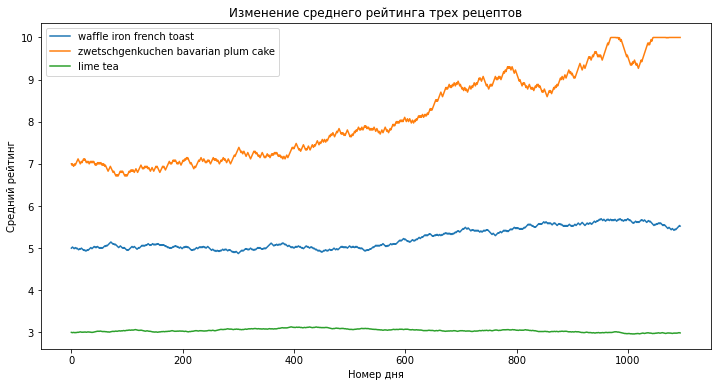

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных из файла
data = np.load('data/average_ratings.npy')

# Названия рецептов
recipes = [
    "waffle iron french toast",
    "zwetschgenkuchen bavarian plum cake",
    "lime tea"
]

# Количество дней (длина временного ряда)
num_days = data.shape[1]

# Создание фигуры и осей
plt.figure(figsize=(12, 6))

# Построение временных рядов
for i in range(data.shape[0]):
    plt.plot(range(num_days), data[i], label=recipes[i])

# Добавление подписей осей
plt.xlabel('Номер дня')
plt.ylabel('Средний рейтинг')

# Добавление заголовка
plt.title('Изменение среднего рейтинга трех рецептов')

# Добавление легенды
plt.legend()

# Отображение графика
plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


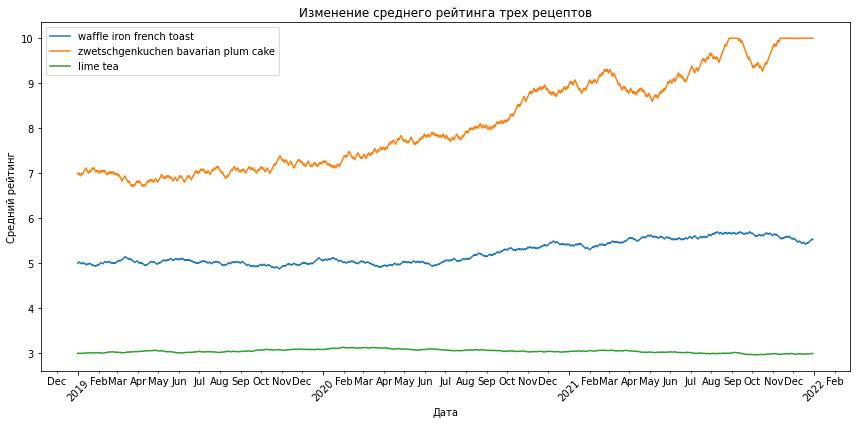

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Загрузка данных из файла
data = np.load('data/average_ratings.npy')

# Проверка формы данных и преобразование при необходимости
if len(data.shape) == 1:
    data = data.reshape((1, -1))

# Названия рецептов
recipes = [
    "waffle iron french toast",
    "zwetschgenkuchen bavarian plum cake",
    "lime tea"
]

# Создание диапазона дат
dates = pd.date_range(start="2019-01-01", end="2021-12-30").to_numpy()

# Проверка совпадения формы данных и количества дат
if data.shape[1] != len(dates):
    raise ValueError(f"Expected data with {len(dates)} columns, but got {data.shape[1]} columns")

# Создание фигуры и осей
plt.figure(figsize=(12, 6))

# Построение временных рядов
for i in range(data.shape[0]):
    plt.plot(dates, data[i], label=recipes[i])

# Настройка формата оси X для отображения годов и месяцев
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

# Добавление подписей осей
plt.xlabel('Дата')
plt.ylabel('Средний рейтинг')

# Добавление заголовка
plt.title('Изменение среднего рейтинга трех рецептов')

# Добавление легенды
plt.legend()

# Поворот меток оси X для лучшей читаемости
plt.xticks(rotation=45)

# Отображение графика
plt.tight_layout()
plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

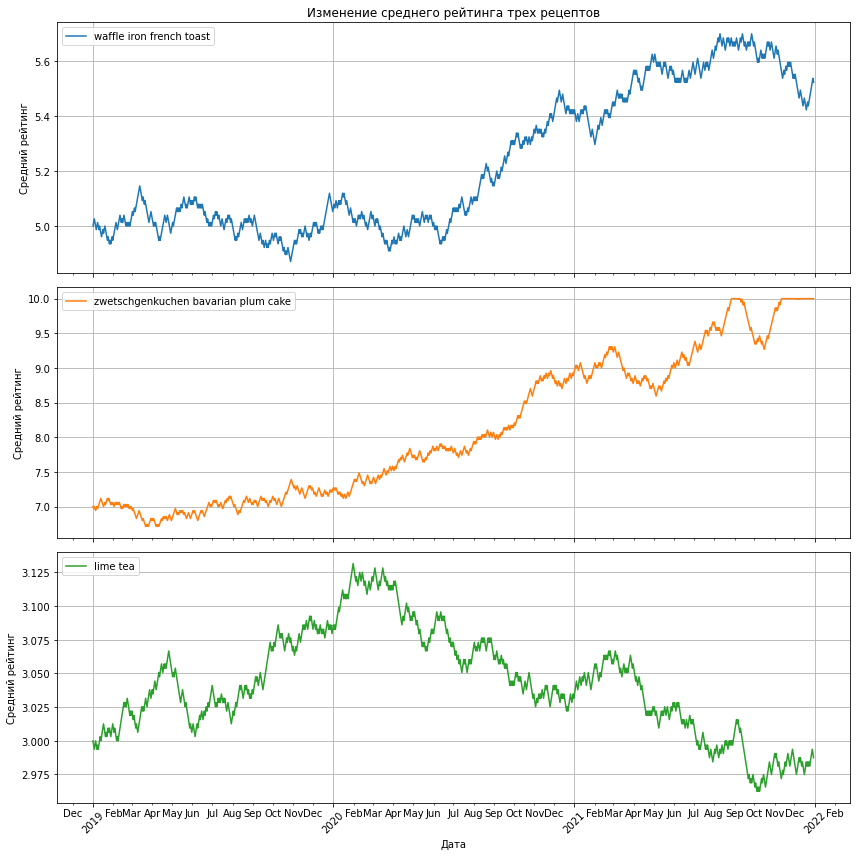

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Загрузка данных из файла
data = np.load('data/average_ratings.npy')

# Названия рецептов
recipes = [
    "waffle iron french toast",
    "zwetschgenkuchen bavarian plum cake",
    "lime tea"
]

# Создание диапазона дат
dates = pd.date_range(start="2019-01-01", end="2021-12-30").to_numpy()

# Создание фигуры и субплотов
fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

for i in range(data.shape[0]):
    axs[i].plot(dates, data[i], label=recipes[i], color=f"C{i}")
    axs[i].set_ylabel('Средний рейтинг')
    axs[i].legend(loc='upper left')
    axs[i].grid(True)

# Настройка формата оси X для отображения годов и месяцев
axs[2].xaxis.set_major_locator(mdates.YearLocator())
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[2].xaxis.set_minor_locator(mdates.MonthLocator())
axs[2].xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

# Добавление подписи к общей горизонтальной оси
axs[2].set_xlabel('Дата')

# Добавление заголовка к верхнему subplot
axs[0].set_title('Изменение среднего рейтинга трех рецептов')

# Поворот меток оси X для лучшей читаемости
plt.setp(axs[2].xaxis.get_majorticklabels(), rotation=45)

# Автоматическая настройка параметров компоновки
plt.tight_layout()

# Отображение графика
plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


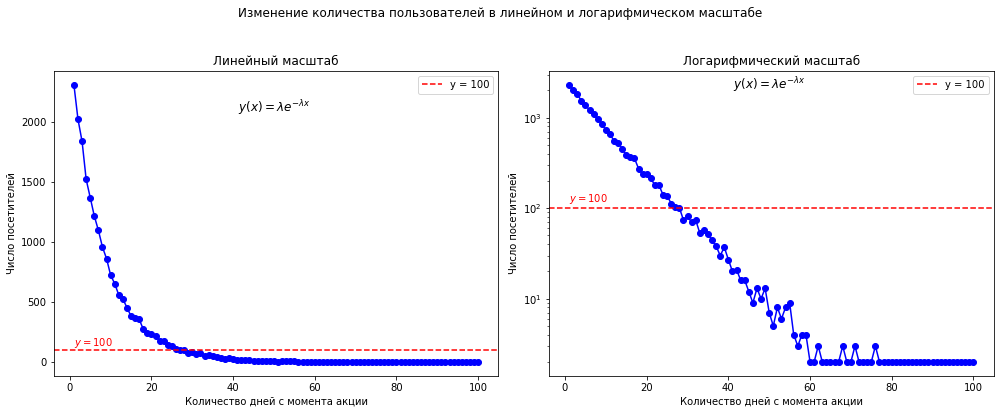

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных из файла
visitors = np.load('data/visitors.npy')

# Дни с момента акции
days = np.arange(1, 101)

# Создание фигуры и субплотов
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Построение графика с линейным масштабом
ax1.plot(days, visitors, marker='o', linestyle='-', color='b')
ax1.set_title('Линейный масштаб')
ax1.set_xlabel('Количество дней с момента акции')
ax1.set_ylabel('Число посетителей')

# Построение графика с логарифмическим масштабом по вертикальной оси
ax2.plot(days, visitors, marker='o', linestyle='-', color='b')
ax2.set_yscale('log')
ax2.set_title('Логарифмический масштаб')
ax2.set_xlabel('Количество дней с момента акции')
ax2.set_ylabel('Число посетителей')

# Добавление красной горизонтальной линии на уровне 100 и подписи к ней
for ax in [ax1, ax2]:
    ax.axhline(y=100, color='r', linestyle='--', label='y = 100')
    ax.text(1, 105, '$y = 100$', color='r', verticalalignment='bottom')

# Добавление текстовой аннотации над графиками
for ax in [ax1, ax2]:
    ax.text(50, max(visitors)*0.9, r'$y(x)=\lambda e^{-\lambda x}$', fontsize=12, horizontalalignment='center')

# Добавление общего заголовка для фигуры
fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')

# Добавление легенды
ax1.legend()
ax2.legend()

# Отображение графика
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [5]:
recipes = pd.read_csv('data/recipes_sample.csv', parse_dates=['submitted'])
reviews = pd.read_csv('data/reviews_sample.csv', index_col = 0)

In [6]:
reviews = reviews.sort_index()
print(len(reviews.index.unique()))
reviews.head()

126696


,user_id,recipe_id,date,rating,review
5,52282,120345,2005-05-21,4,very very sweet. after i waited the 2 days i b...
6,124416,120345,2011-08-06,0,"Just an observation, so I will not rate. I fo..."
7,2000192946,120345,2015-05-10,2,This recipe was OVERLY too sweet. I would sta...
8,76535,134728,2005-09-02,4,Very good!
9,273745,134728,2005-12-22,5,Better than the real!!


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

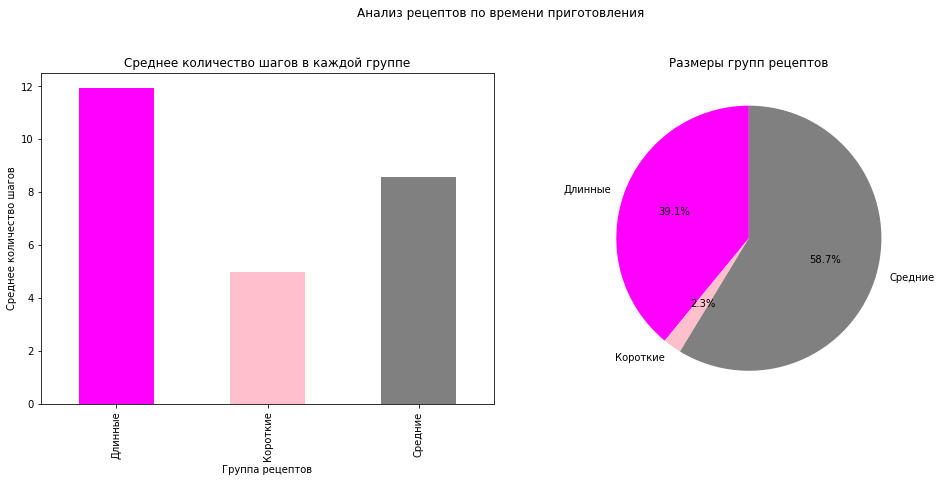

In [11]:
def categorize_recipe(minutes):
    if minutes < 5:
        return 'Короткие'
    elif 5 <= minutes < 50:
        return 'Средние'
    else:
        return 'Длинные'

recipes['category'] = recipes['minutes'].apply(categorize_recipe)

# Группировка рецептов по категориям и расчет средней длительности и размера группы
grouped_recipes = recipes.groupby('category').agg({
    'n_steps': 'mean',
    'id': 'size'
}).rename(columns={'n_steps': 'average_steps', 'id': 'group_size'})

# Построение столбчатой диаграммы для среднего количества шагов
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

grouped_recipes['average_steps'].plot(kind='bar', ax=ax1, color=['magenta', 'pink', 'grey'])
ax1.set_title('Среднее количество шагов в каждой группе')
ax1.set_xlabel('Группа рецептов')
ax1.set_ylabel('Среднее количество шагов')

# Построение круговой диаграммы для размеров групп
grouped_recipes['group_size'].plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90, colors=['magenta', 'pink', 'grey'])
ax2.set_title('Размеры групп рецептов')
ax2.set_ylabel('')

# Добавление общего заголовка для фигуры
fig.suptitle('Анализ рецептов по времени приготовления')

# Отображение графиков
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

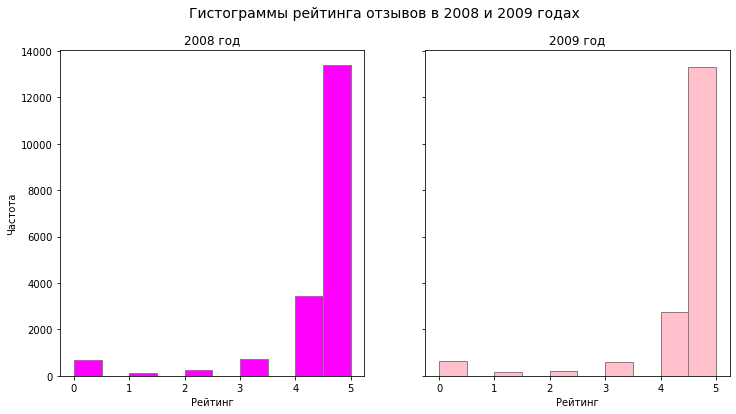

In [13]:
# привожу столбец reviews['date'] к формату datetime
reviews['date'] = pd.to_datetime(reviews['date'])
# создаю переменную reviews_2008_2009 в которой будут храниться только данные за 2008 и 2009 год
# с помощью конструкции reviews['date'].dt.year мы выбирем подходящие года, само же выражение создает 
# булев массив в котором 2008 и 2009 год True остальные False работает же это с помощью побитового оператора |
reviews_2008_2009 = reviews[(reviews['date'].dt.year == 2008) | (reviews['date'].dt.year == 2009)]

# разделяю данные на два датафрейма для каждого года
reviews_2008 = reviews_2008_2009[reviews_2008_2009['date'].dt.year == 2008]
reviews_2009 = reviews_2008_2009[reviews_2008_2009['date'].dt.year == 2009]

# создаем параметры будущего графика 1 строка, 2 столбца и размер в дюймах, паметр sharey=True
# позволяет использовать 1 лейбл y для обоих графиков (убирает лейбл у второго графика)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True) 

# строю гистограммы для каждого датафрейма edgecolor отвечает за цвет границ каждого столбца
reviews_2008['rating'].plot.hist(ax=ax1, color='magenta', edgecolor='grey')
reviews_2009['rating'].plot.hist(ax=ax2, color='pink', edgecolor='grey')

# общее название графика, размер шрифта 14
fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах', fontsize=14) 

# тайтл первого графика
ax1.set_title('2008 год')
# надпись оси абсцисс
ax1.set_xlabel('Рейтинг')
# надпись оси ординат
ax1.set_ylabel('Частота')
# тайтл второго графика
ax2.set_title('2009 год')
# надпись оси абсцисс
ax2.set_xlabel('Рейтинг')

# выводим график
plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

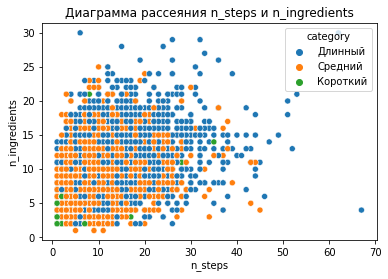

In [48]:
import seaborn as sns
import pandas as pd

# Загрузка данных из файла
recipes = pd.read_csv('data/recipes_sample.csv')

# Определение категорий рецептов
def categorize_recipe(minutes):
    if minutes < 5:
        return 'Короткий'
    elif 5 <= minutes < 50:
        return 'Средний'
    else:
        return 'Длинный'

recipes['category'] = recipes['minutes'].apply(categorize_recipe)

# Построение диаграммы рассеяния
sns.scatterplot(data=recipes, x='n_steps', y='n_ingredients', hue='category')
plt.title('Диаграмма рассеяния n_steps и n_ingredients')
print()

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

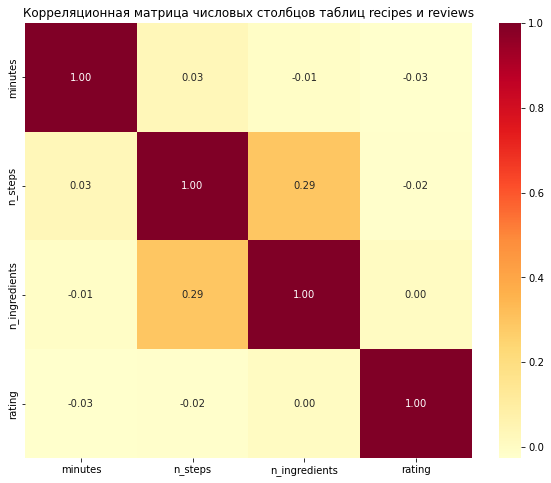

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных из CSV файлов (замените на ваши пути к файлам)
recipes = pd.read_csv('data/recipes_sample.csv')
reviews = pd.read_csv('data/reviews_sample.csv')

# Объединяем таблицы по ключам: 'id' в recipes и 'recipe_id' в reviews
merged_data = pd.merge(recipes, reviews, left_on='id', right_on='recipe_id')

# Выбираем интересующие нас столбцы
selected_columns = merged_data[['minutes', 'n_steps', 'n_ingredients', 'rating']]

# Строим корреляционную матрицу
corr_matrix = selected_columns.corr()

# Визуализируем корреляционную матрицу
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', fmt='.2f') # Это функция из библиотеки Seaborn, 
#которая используется для создания тепловой карты. annot=True: Этот параметр указывает, что на тепловой карте должны
# быть аннотации. Это значит, что значения корреляционных коэффициентов будут отображаться внутри каждой ячейки тепловой
# карты.cmap='YlOrRd': Этот параметр задает цветовую палитру для тепловой карты. В данном случае используется палитра
# "Yellow-Orange-Red", которая идет от желтого к оранжевому и красному, показывая градацию значений.
# fmt='.2f': Этот параметр определяет формат отображения чисел в аннотациях. Здесь указано, что числа должны быть
# представлены в формате с двумя знаками после запятой.

# Добавляем заголовок
plt.title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')
plt.show()
